#Task - 2 (AI / ML)
##High contrast and low contrast color image classification
###Hello team,
###I have used VOC2007 original dataset for this task as dataset was not available, I created the dataset by changing the contrast of the images in original dataset and stored them to use as training as well as testing images.

In [18]:
import tensorflow as tf
import numpy as np # numpy (Numerical python) library to work with N - dimensional arrays.
from tensorflow.keras.preprocessing import image # Tensorflow library used for preprocessing of image dataset.
from tensorflow.keras import layers # Tensorflow library for creating functional model.
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D,Dropout #Different layers of Neural Network
from tensorflow.keras.models import Model # for creating functional model.
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow
from PIL import Image, ImageEnhance # Pillow python library for working with Images.
from tensorflow.keras.preprocessing import image_dataset_from_directory # Special function for automatic labelling task.
import os # os module to work with file system.
import glob 
import random
from keras.utils.vis_utils import plot_model # To visualize Neural Network model.

####Creating different directories to store data

In [ ]:
os.mkdir("/content/drive/MyDrive/Task_Logictrix/dataset")
os.mkdir("/content/drive/MyDrive/Task_Logictrix/dataset/low")
os.mkdir("/content/drive/MyDrive/Task_Logictrix/dataset/high")

In [ ]:
count = 0
for i in glob.glob("/content/drive/MyDrive/Task_Logictrix/JPEGImages/*"):
  count += 1

print("Total images available are",count)

Total images available are 4398


####Converting regular image to low contrast image and storing it in directory named "low"

In [ ]:
count = 0
for i in glob.glob("/content/drive/MyDrive/Task_Logictrix/JPEGImages/*"):
  im = Image.open(i)
  enhancer = ImageEnhance.Contrast(im)
  im_out = enhancer.enhance(random.uniform(0.1,0.5)) # Using random function to generalise the data
  im_out.save(f"/content/drive/MyDrive/Task_Logictrix/dataset/low/{count}.jpg")
  count += 1

####Converting regular image to low contrast image and storing it in directory named "high"

In [ ]:
count = 0
for i in glob.glob("/content/drive/MyDrive/Task_Logictrix/JPEGImages/*"):
  im = Image.open(i)
  enhancer = ImageEnhance.Contrast(im)
  im_out = enhancer.enhance(random.uniform(1.5,2.0))
  im_out.save(f"/content/drive/MyDrive/Task_Logictrix/dataset/high/{count}.jpg")
  count += 1

In [ ]:
high = 0
low = 0
for i in glob.glob("/content/drive/MyDrive/Task_Logictrix/dataset/high/*"):
  high += 1

for i in glob.glob("/content/drive/MyDrive/Task_Logictrix/dataset/low/*"):
  low += 1

print("Total number of high contrast images are",high)
print("Total number of low contrast images are",low)

Total number of high contrast images are 4398
Total number of low contrast images are 4398


####Selecting "dataset" directory as Base directory

In [5]:
BASE_DIR = "/content/drive/MyDrive/Task_Logictrix/dataset/"
os.listdir(BASE_DIR)

['low', 'high']

####Creating training as well as validation data using (80 / 20) ratio and selecting **32** as batch size and **(320,320)** as input image size.
####"image_dataset_from_directory" automatically creates labels for us.

In [6]:
batch_size = 32
image_size = (320,320)
train_ds = image_dataset_from_directory(
    BASE_DIR,
    batch_size = batch_size,
    image_size = image_size,
    shuffle = True,
    seed = 42,
    validation_split = 0.2,
    subset = "training",
)
val_ds = image_dataset_from_directory(
    BASE_DIR,
    batch_size = batch_size,
    image_size = image_size,
    shuffle = True,
    seed = 42,
    validation_split = 0.2,
    subset = "validation",
)

Found 8796 files belonging to 2 classes.
Using 7037 files for training.
Found 8796 files belonging to 2 classes.
Using 1759 files for validation.


####Some training dataset images with their labels generated by tensorflow

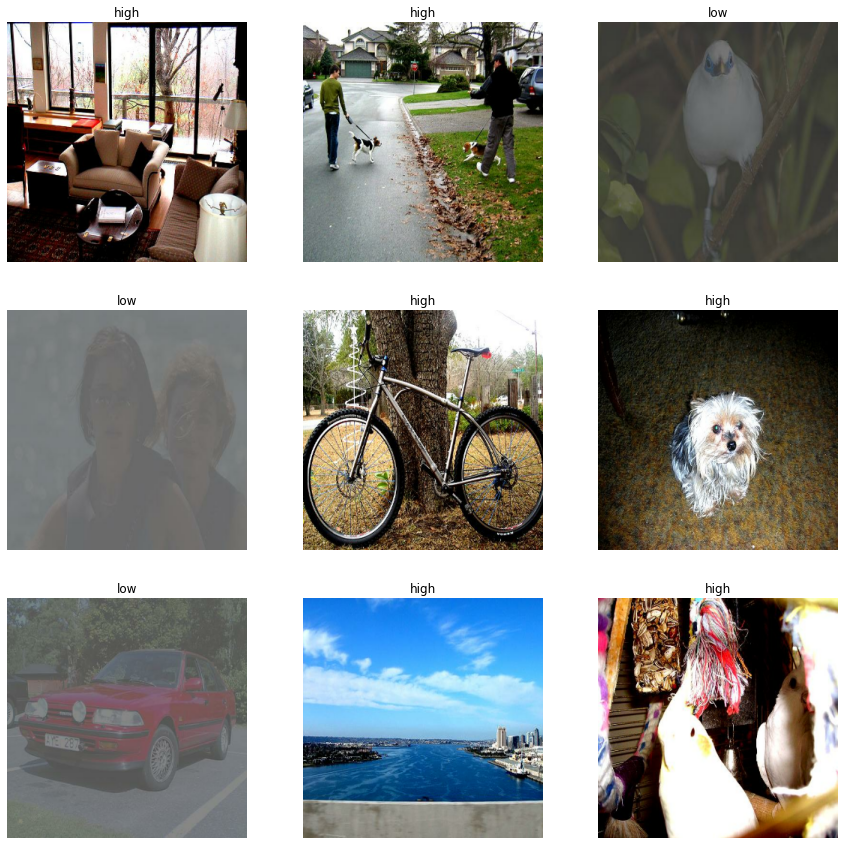

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

####Using **prefetch** to save next batches of images in cache memory so that execution can be made faster.

In [7]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

####Preprocessing image data by dividing each pixel by **255** so that neural network can easily find pattern.

In [8]:
normalize_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [9]:
train_ds = train_ds.map(lambda x,y: (normalize_layer(x),y))
val_ds = val_ds.map(lambda x,y: (normalize_layer(x), y))

##Model Building.
####In this phase I have created simple Convolution neural network model.

In [7]:
def create_model(input_shape = (320,320,3)):
  x_input = Input(input_shape)
  x = ZeroPadding2D((3,3))(x_input)

  x = Conv2D(filters=16,kernel_size=(3,3),padding="same")(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Conv2D(filters=32,kernel_size=(3,3),padding="same")(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Conv2D(filters=64,kernel_size=(3,3),padding="same")(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Conv2D(filters=64,kernel_size=(3,3),padding="same")(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Flatten()(x)
  x = Dense(units=128, activation="relu")(x)
  x = Dense(units = 2)(x)

  mod = Model(inputs=x_input, outputs=x)
  return mod

In [8]:
model = create_model()

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 326, 326, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 326, 326, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 326, 326, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 326, 326, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 163, 163, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 163, 163, 32)      4640  

In [10]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [11]:
epochs = 5
history = model.fit(
    train_ds,
    epochs=epochs
)

Epoch 1/5
220/220 [==============================] - 72s 94ms/step - loss: 0.2514 - accuracy: 0.9864
Epoch 2/5
220/220 [==============================] - 20s 91ms/step - loss: 0.0142 - accuracy: 0.9972
Epoch 3/5
220/220 [==============================] - 20s 91ms/step - loss: 0.0331 - accuracy: 0.9962
Epoch 4/5
220/220 [==============================] - 20s 90ms/step - loss: 0.0138 - accuracy: 0.9974
Epoch 5/5
220/220 [==============================] - 20s 90ms/step - loss: 0.0087 - accuracy: 0.9982


####Saving model for next time usage of it.

In [12]:
os.mkdir("/content/drive/MyDrive/Task_Logictrix/save_model/")

In [13]:
model.save("/content/drive/MyDrive/Task_Logictrix/save_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Task_Logictrix/save_model/assets


In [3]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Task_Logictrix/save_model/")

####Evaluating model by giving test data to it.

In [10]:
model.evaluate(val_ds)

55/55 [==============================] - 36s 98ms/step - loss: 0.0069 - accuracy: 0.9989


[0.006866111420094967, 0.9988629817962646]

##Convolutional neural network(CNN) model working very good and giving accuracy around **99.86%** on training data.

####Plot showing training accuracy with each epoch.

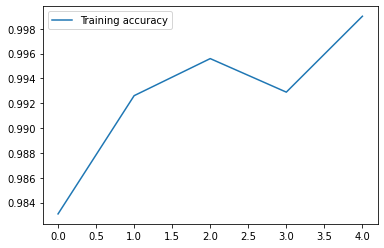

In [ ]:
train_acc = []
train_acc += history.history["accuracy"]
plt.plot(train_acc,label="Training accuracy")
plt.legend()

####Taking random images to check the model's performance.

In [11]:
batch_size = 32
image_size = (320,320)
experiment_ds = image_dataset_from_directory(
    BASE_DIR,
    batch_size = batch_size,
    image_size = image_size,
    shuffle = True,
    seed = 42,
    validation_split = 0.2,
    subset = "training",
)

Found 8796 files belonging to 2 classes.
Using 7037 files for training.


In [12]:
normalize_exp_ds = experiment_ds.map(lambda x,y : (normalize_layer(x),y))

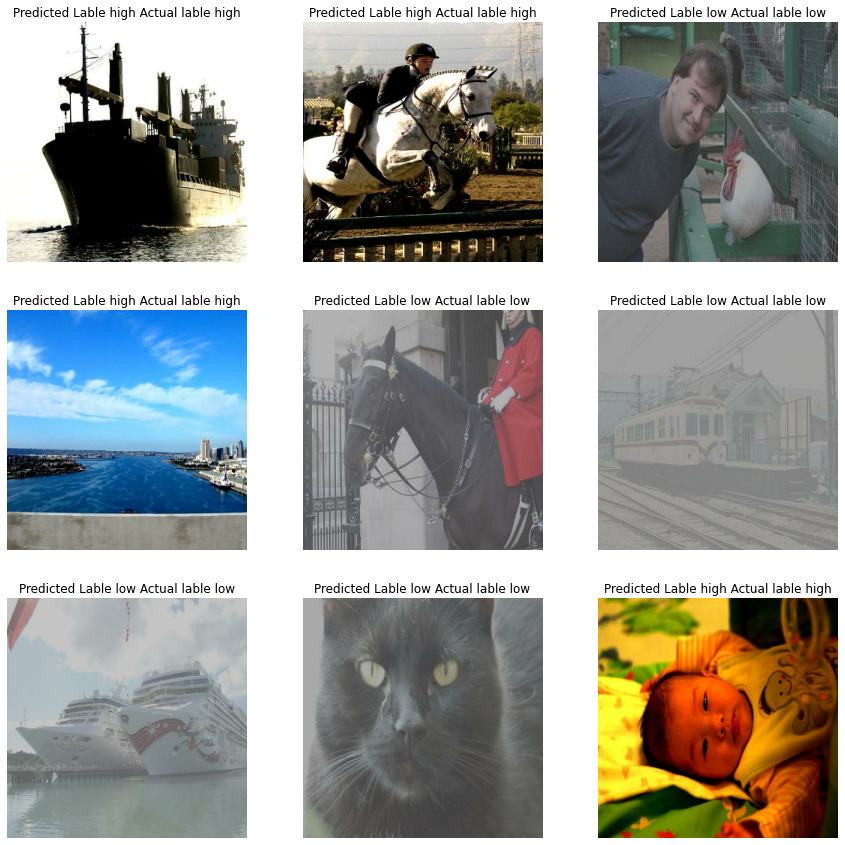

In [15]:
plt.figure(figsize=(15, 15))
for images, labels in experiment_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Predicted Lable "+ experiment_ds.class_names[np.argmax(model.predict((images[i].numpy().reshape((1,320,320,3))) / 255.))] +" Actual lable "+  experiment_ds.class_names[labels[i]],fontsize = 12)
        plt.axis("off")

####Image of neural network model.

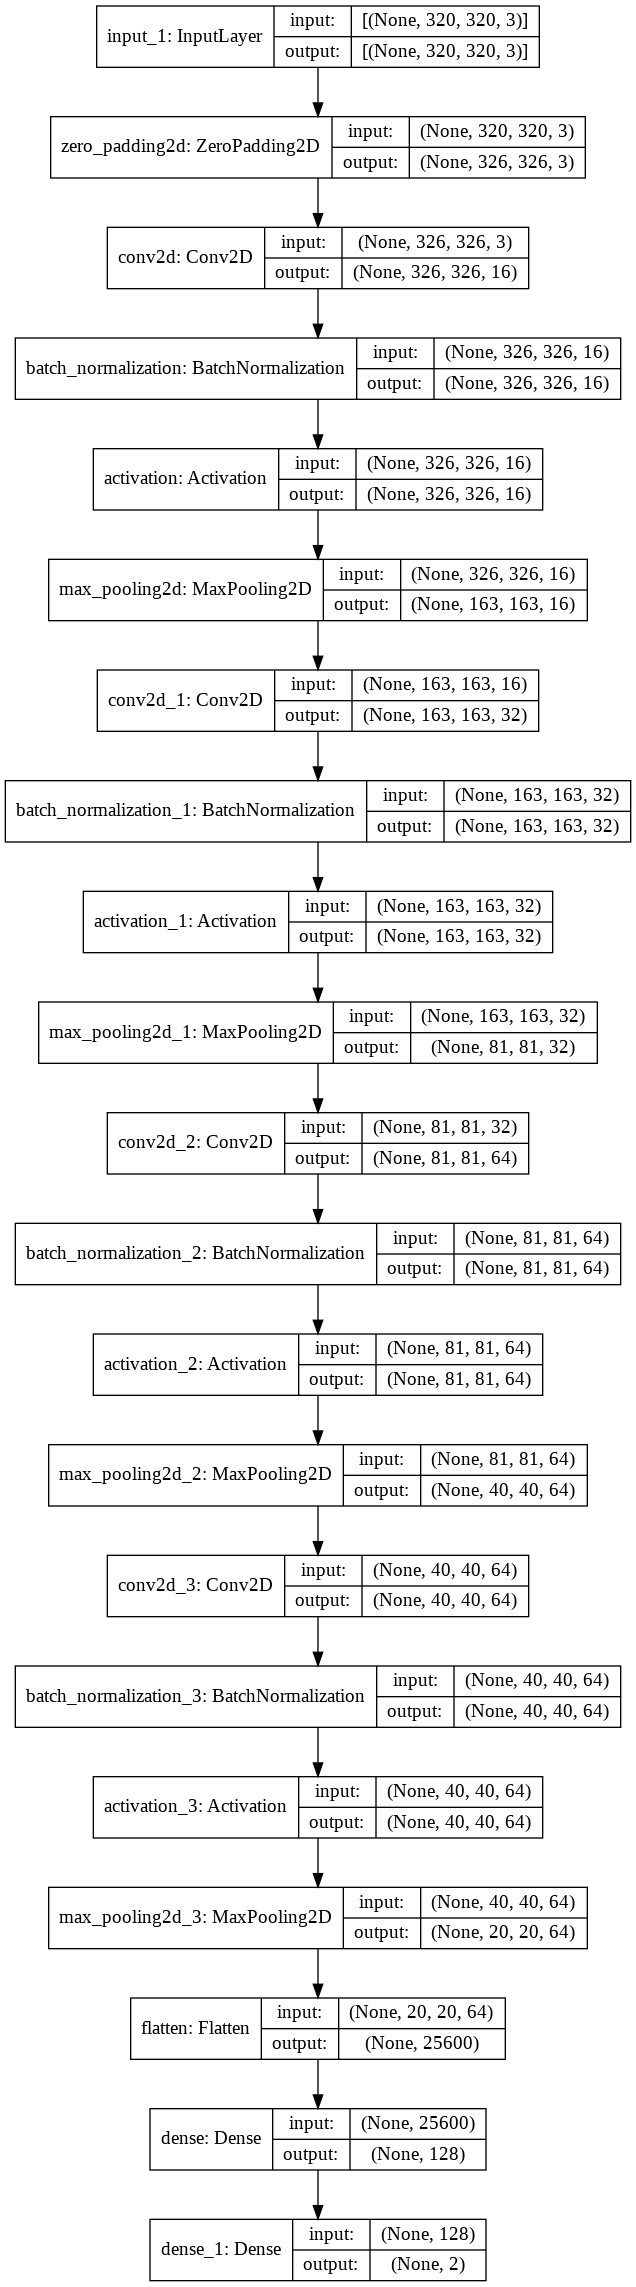

In [16]:
plot_model(model, show_shapes=True, show_layer_names=True)